<a href="https://colab.research.google.com/github/RajathKashyap/Online-Shoppers-Purchasing-Intention/blob/master/OnlineShoppingDataset_Bish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install shap pdpbox

In [0]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import shap
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [3]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
data=pd.read_csv(URL)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
data['Revenue'] = data['Revenue'].astype(int)
data['Weekend'] = data['Weekend'].astype(int)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


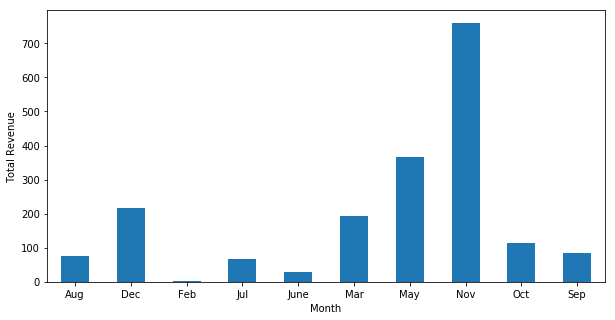

In [7]:
# Total Revenue by month.

monthly_revenue = data.groupby(['Month'])[['Revenue']].agg('sum')
graph = monthly_revenue.unstack().plot(kind='bar', figsize=(10,5))
plt.xticks(np.arange(10), sorted(data.Month.unique()), rotation=0)
graph.set_xlabel('Month')
graph.set_ylabel('Total Revenue')
plt.show()


Highest Revenue is in the month of November

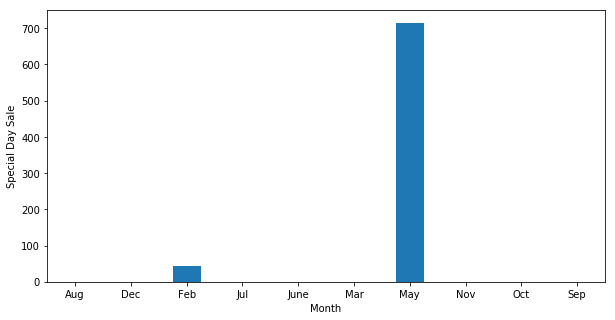

In [8]:
specialDay_data = data.groupby(['Month'])[['SpecialDay']].agg('sum')
graph = specialDay_data.unstack().plot(kind='bar', figsize=(10,5))
plt.xticks(np.arange(10), sorted(data.Month.unique()), rotation=0)
graph.set_xlabel('Month')
graph.set_ylabel('Special Day Sale')
plt.show()


May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


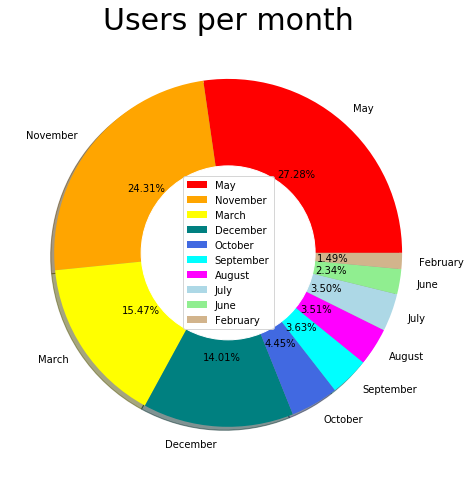

In [9]:
#checking the months with most no.of customers visiting the online shopping sites
print(data['Month'].value_counts())

# plotting a pie chart for share of customers per month
plt.rcParams['figure.figsize'] = (20, 8)
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['red', 'orange', 'yellow', 'teal', 'royalblue', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'tan']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.5, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels,  explode=explode, shadow = True, autopct = '%.2f%%')
plt.title('Users per month', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend(loc='center')
plt.show()


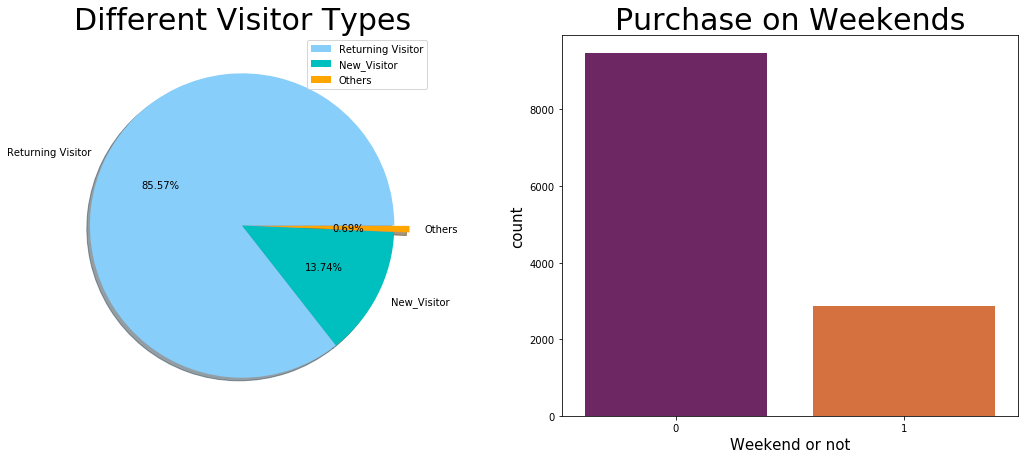

In [10]:
# plotting a pie chart for different Visitors

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightskyblue', 'c', 'orange']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitor Types', fontsize = 30)
plt.axis('off')
plt.legend()

# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

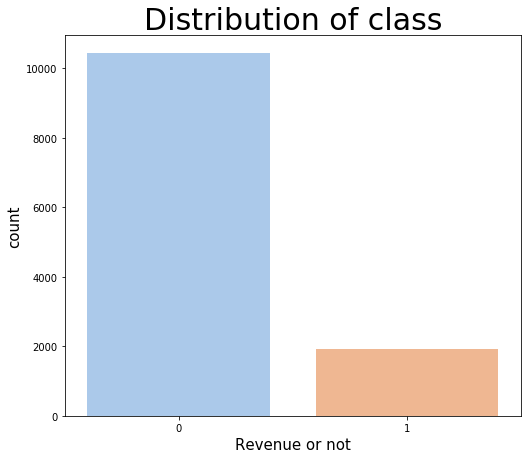

In [11]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(data['Revenue'], palette = 'pastel')
plt.title('Distribution of class', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

## Bivariate Analysis

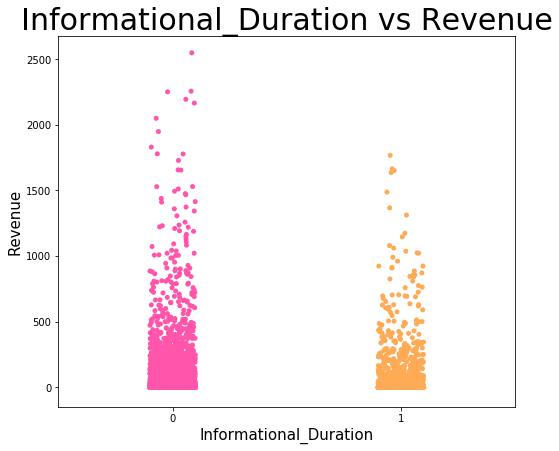

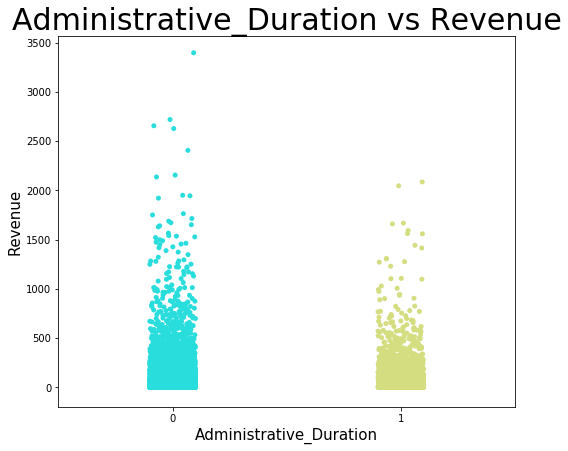

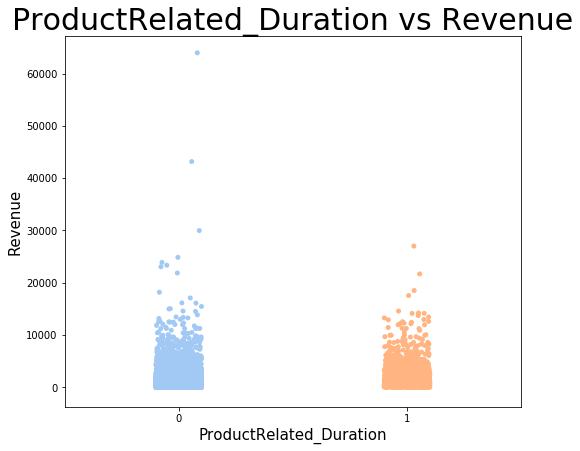

In [12]:
# Informational_Duration, Administrative_Duration, product related duration vs revenue

plt.rcParams['figure.figsize'] = (18, 15)

labels = ['Informational_Duration', 'Administrative_Duration', 'ProductRelated_Duration']
palettes = ['spring', 'rainbow', 'pastel']

for index, label in enumerate(labels):
    plt.subplot(2, 2, 1)
    sns.stripplot(data['Revenue'], data[label], palette = palettes[index])
    title = label + ' vs Revenue' 
    plt.title(title, fontsize = 30)
    plt.xlabel(label, fontsize = 15)
    plt.ylabel('Revenue', fontsize = 15)
    plt.show()


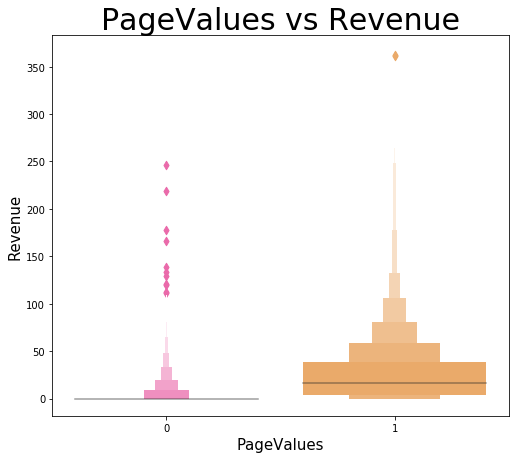

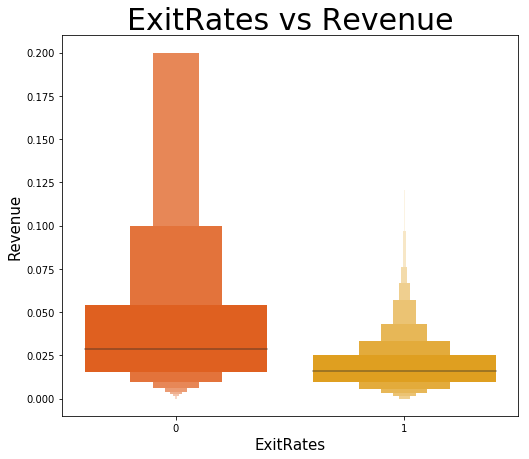

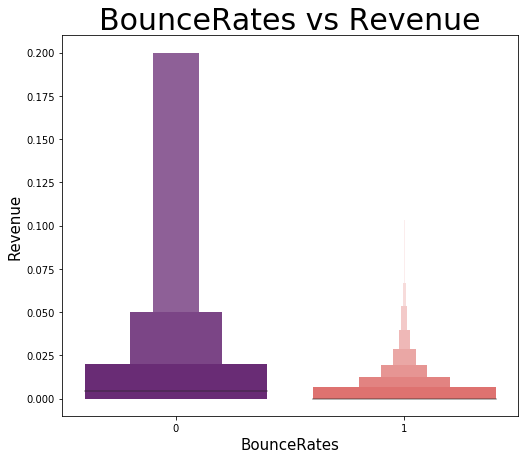

In [13]:
plt.rcParams['figure.figsize'] = (18, 7)
labels = ['PageValues', 'ExitRates', 'BounceRates']
palettes = ['spring', 'autumn', 'magma']

for index, label in enumerate(labels):
    plt.subplot(1, 2, 1)
    sns.boxenplot(data['Revenue'], data[label], palette = palettes[index])
    title = label + ' vs Revenue' 
    plt.title(title, fontsize = 30)
    plt.xlabel(label, fontsize = 15)
    plt.ylabel('Revenue', fontsize = 15)
    plt.show()


In [0]:
# Converting non-numeric values to numbers

# Assigning numbers to Months
temp_data = data
month_map={'Feb':2,'Mar':3,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
temp_data['Month']=temp_data['Month'].map(month_map)

#Assigning numbers to Visitor Type
vistor_map={'New_Visitor':0,'Returning_Visitor':1,'Other':2}
temp_data['VisitorType']=temp_data['VisitorType'].map(vistor_map)
temp_data['Weekend'] = temp_data['Weekend'].astype(int)

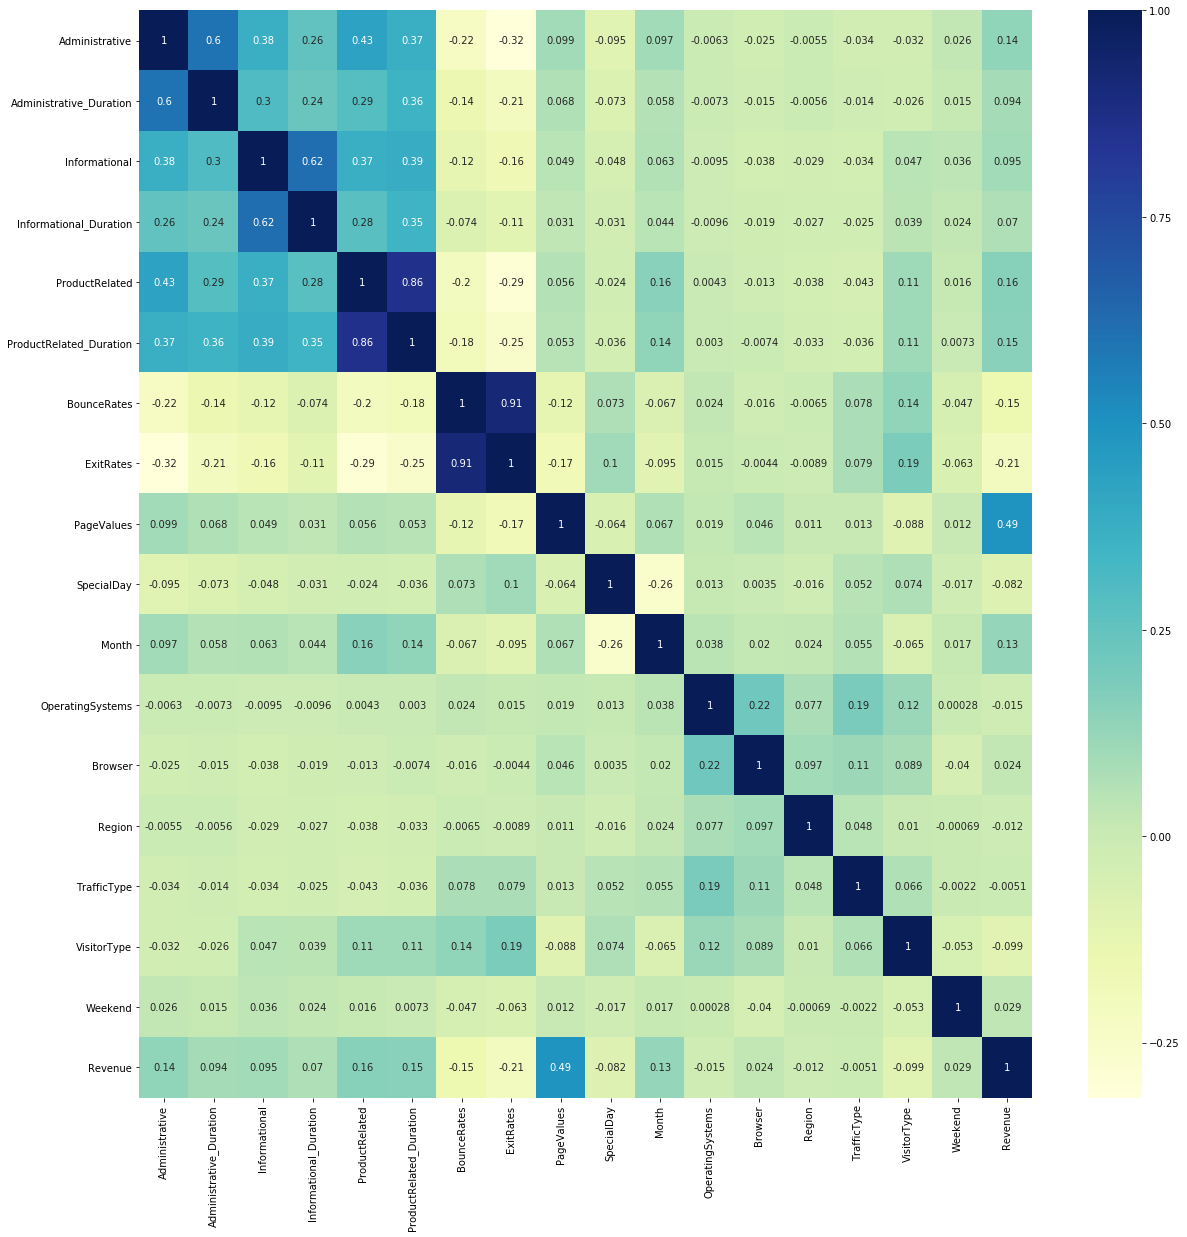

In [15]:
# Correlations between features.

correlations=temp_data.corr()
correlations

plt.figure(figsize=(20,20))
sns.heatmap(correlations,xticklabels=correlations.columns,yticklabels=correlations.columns,annot=True, cmap="YlGnBu")

In [16]:
temp_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


## Modeling

### Helper Methods

In [0]:
# Method to split data into for Training and Testing.

def split_data(myData, testSize, className = 'Revenue'):
  
  x = myData.drop([className], axis=1)
  y = myData[className]
  
  return train_test_split(x, y, test_size=testSize, random_state=0)


In [0]:
def evaluate_model(y_test, y_pred):

  acc = accuracy_score(y_test, y_pred)
  print('Accuracy : ', acc)

  # classification report
  cr = classification_report(y_test, y_pred)
  print('Classification Report :')
  print(cr)
  
  # confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  print('Confusion Matrix :')
  
  plt.rcParams['figure.figsize'] = (6, 6)
  sns.heatmap(cm ,annot = True)

## 1. Naive Bayes

Accuracy :  0.8461070559610706
Classification Report :
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4137
           1       0.52      0.53      0.53       795

    accuracy                           0.85      4932
   macro avg       0.72      0.72      0.72      4932
weighted avg       0.85      0.85      0.85      4932

Confusion Matrix :


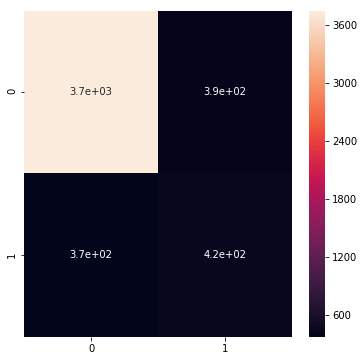

In [19]:
models = []

gnb = GaussianNB()

x_train, x_test, y_train, y_test = split_data(temp_data, 0.4)

y_pred = gnb.fit(x_train, y_train).predict(x_test)

models.append({'model' : gnb, 'label': 'Naive Bayes', 'x_test': x_test, 'y_test': y_test})

evaluate_model(y_test, y_pred)

## 2. Random Forest Search

In [20]:
# Split data

x_train, x_test, y_train, y_test = split_data(temp_data, 0.3)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (8631, 17)
Shape of y_train : (8631,)
Shape of x_test : (3699, 17)
Shape of y_test : (3699,)


Accuracy :  0.8869964855366316
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3077
           1       0.75      0.50      0.60       622

    accuracy                           0.89      3699
   macro avg       0.83      0.73      0.77      3699
weighted avg       0.88      0.89      0.88      3699

Confusion Matrix :


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



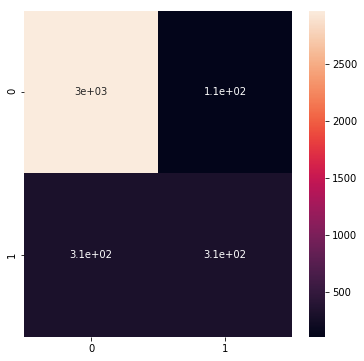

In [21]:
# Modeling

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

models.append({'model' : model, 'label': 'Random Forest Search', 'x_test': x_test, 'y_test': y_test})

evaluate_model(y_test, y_pred)


Optimal number of features: 8
Selected features: ['Administrative', 'Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Month']


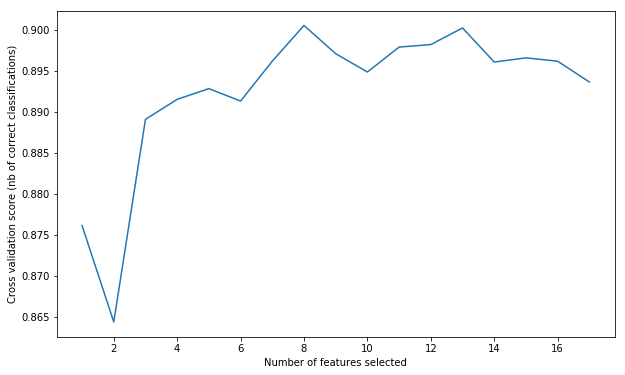

In [35]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications

rfecv = RFECV(estimator=RandomForestClassifier(), step=1, cv=10, scoring='accuracy')
rfecv.fit(x_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(x_train.columns[rfecv.support_]))


# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



Accuracy :  0.8856447688564477
Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2044
           1       0.74      0.50      0.60       422

    accuracy                           0.89      2466
   macro avg       0.82      0.73      0.77      2466
weighted avg       0.88      0.89      0.88      2466

Confusion Matrix :


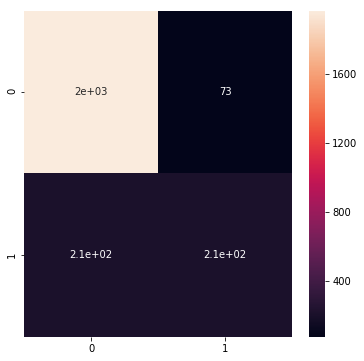

In [36]:
selected_features = list(x_train.columns[rfecv.support_])
x_train = x_train[selected_features]
x_test = x_test[selected_features]

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

models.append({'model' : model, 'label': 'Random Forest Search', 'x_test': x_test, 'y_test': y_test})

evaluate_model(y_test, y_pred)

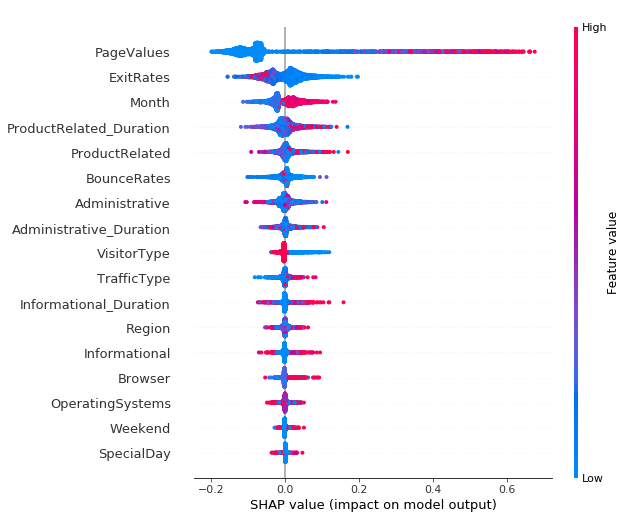

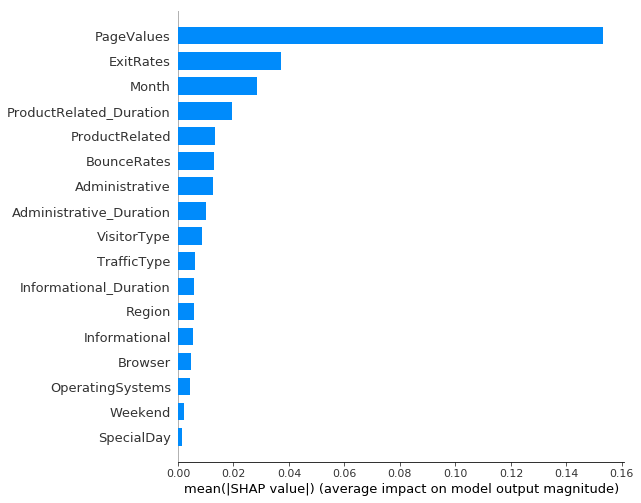

In [22]:
# let's take a look at the shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values[1], x_test)
shap.summary_plot(shap_values[1], x_test, plot_type='bar')

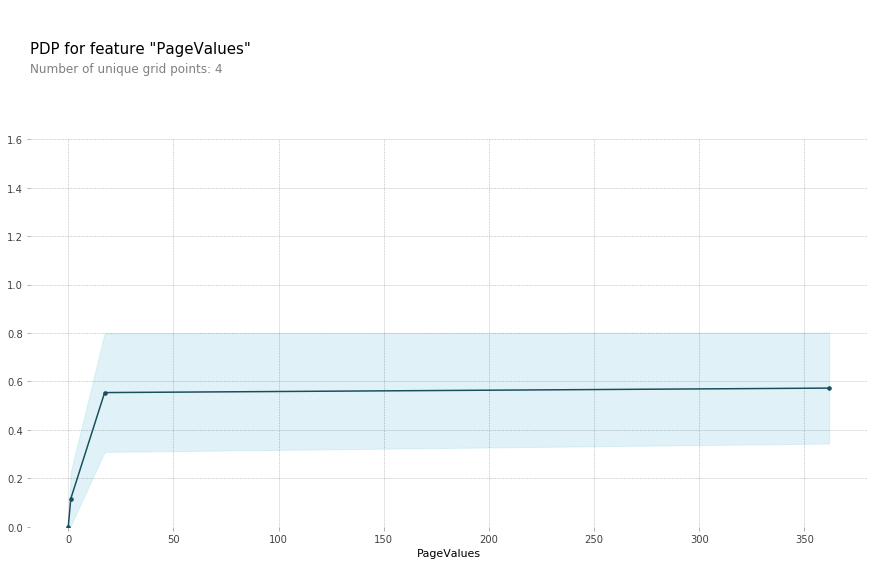

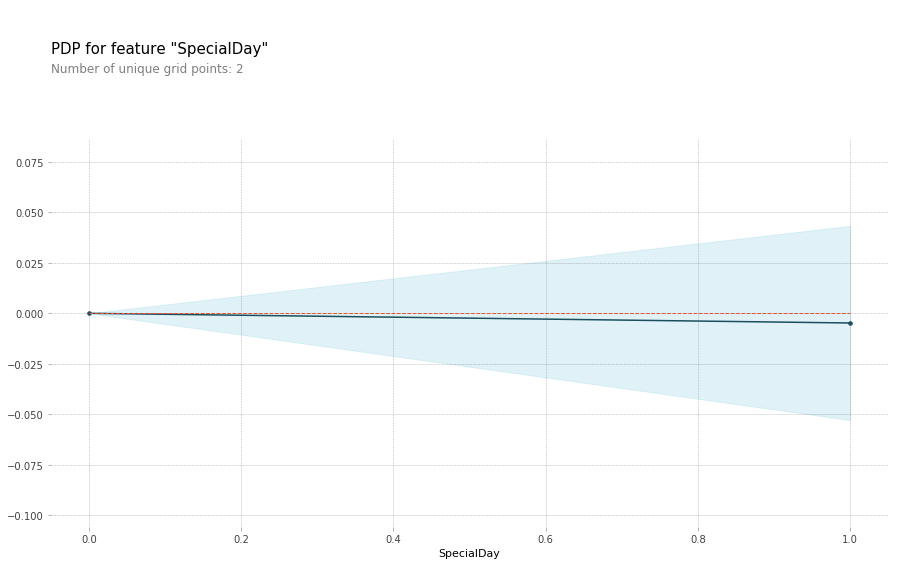

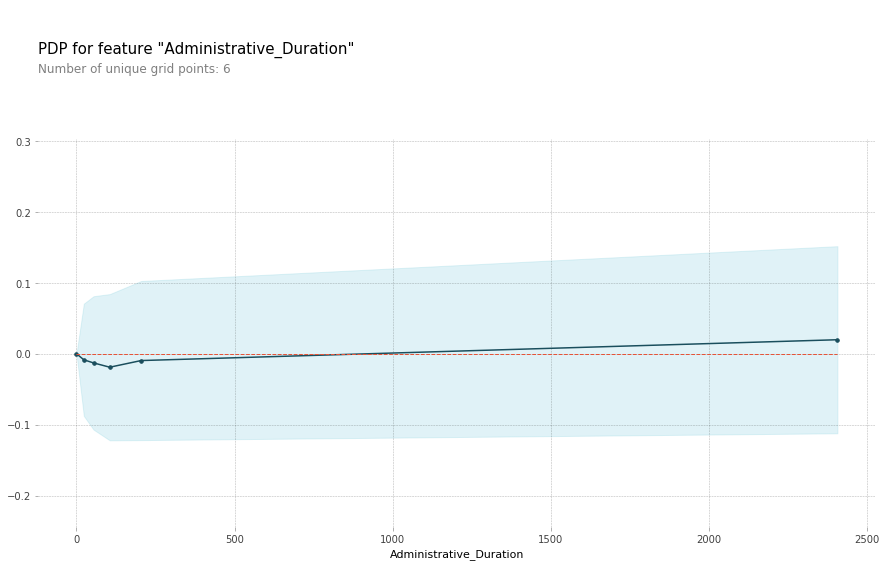

In [23]:
# plotting the partial dependence plot for adminisrative duration

# importing pdp
from pdpbox import pdp, info_plots

base_features = x_test.columns.values.tolist()

feat_name = 'PageValues'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

feat_name = 'SpecialDay'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

feat_name = 'Administrative_Duration'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

## 3. Logistic Regression

Accuracy :  0.8694241686942417
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3077
           1       0.74      0.34      0.47       622

    accuracy                           0.87      3699
   macro avg       0.81      0.66      0.70      3699
weighted avg       0.86      0.87      0.85      3699

Confusion Matrix :


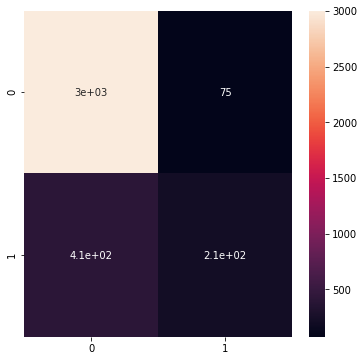

In [24]:
x_train, x_test, y_train, y_test = split_data(temp_data, 0.3)

model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

models.append({'model' : model, 'label': 'Logistic Regression', 'x_test': x_test, 'y_test': y_test})

evaluate_model(y_test, y_pred)

Optimal number of features: 10
Selected features: ['Informational', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'VisitorType', 'Weekend']


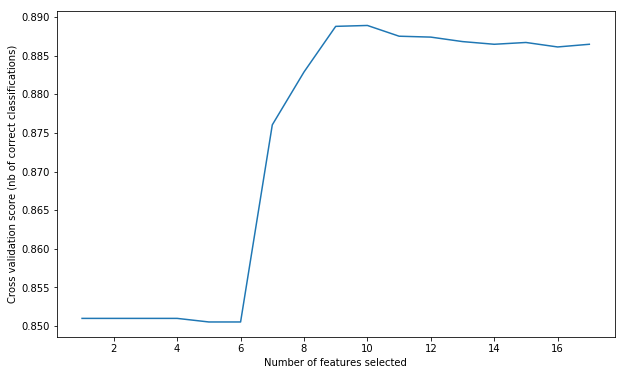

In [25]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(x_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(x_train.columns[rfecv.support_]))


# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Accuracy :  0.8672614220059476
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      3077
           1       0.73      0.33      0.46       622

    accuracy                           0.87      3699
   macro avg       0.81      0.65      0.69      3699
weighted avg       0.85      0.87      0.85      3699

Confusion Matrix :


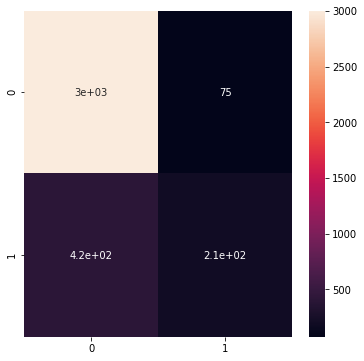

In [26]:
selected_features = list(x_train.columns[rfecv.support_])
x_train = x_train[selected_features]
x_test = x_test[selected_features]

model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

models.append({'model' : model, 'label': 'Logistic Regression', 'x_test': x_test, 'y_test': y_test})

evaluate_model(y_test, y_pred)

## 4. Support Vector Machine

Accuracy :  0.8672614220059476
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      3077
           1       0.73      0.33      0.46       622

    accuracy                           0.87      3699
   macro avg       0.81      0.65      0.69      3699
weighted avg       0.85      0.87      0.85      3699

Confusion Matrix :


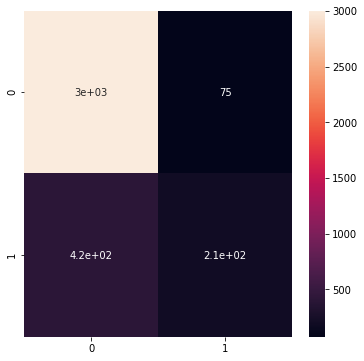

In [27]:
x_train, x_test, y_train, y_test = split_data(temp_data, 0.3)

svc = SVC(probability=True)

svc.fit(x_train, y_train) 

svm_predict=svc.predict(x_test)

models.append({'model' : svc, 'label': 'Support Vector Machine', 'x_test': x_test, 'y_test': y_test})

evaluate_model(y_test, y_pred)

## 5. Neural Network



In [28]:
# Split data

x_train, x_test, y_train, y_test = split_data(temp_data, 0.2)

# checking the shapes

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (9864, 17)
Shape of y_train : (9864,)
Shape of x_test : (2466, 17)
Shape of y_test : (2466,)


In [29]:
# Construct the Neural Network

model = keras.Sequential([
    keras.layers.Dense(40, input_shape=(x_train.shape[1],), activation=tf.nn.relu),
    keras.layers.Dense(units=1, activation=tf.nn.sigmoid)
])


W0804 23:25:20.549858 140253196052352 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
# model compilation - adding loss function, optimizer and a method for metrics

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

W0804 23:25:20.677087 140253196052352 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                720       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


In [0]:
stats = model.fit(x_train, y_train, epochs=80, validation_data=(x_test, y_test), verbose=False)

2466/2466 [==============================] - 0s 26us/sample - loss: 0.3604 - acc: 0.8727


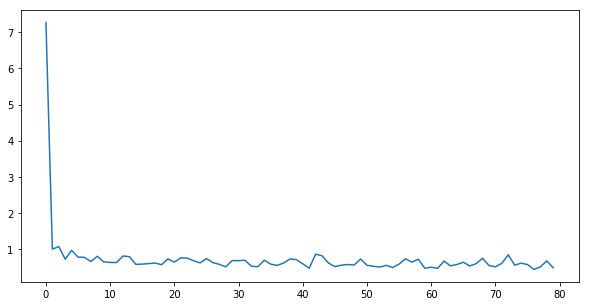

Training accuracy: 0.8937551
Testing accuracy: 0.87266827


In [32]:
models.append({'model' : model, 'label': 'Neural Network', 'x_test': x_test, 'y_test': y_test})

train_acc=model.evaluate(x_train, y_train, batch_size=1000)[1]
test_acc=model.evaluate(x_test, y_test, batch_size=1000)[1]
test_loss, test_accuracy = model.evaluate(x_test, y_test)
losses= stats.history['loss']
plt.figure(figsize=(10,5))
plt.plot(range(len(losses)), losses)
plt.show()
print("Training accuracy: %s" % train_acc)
print("Testing accuracy: %s" % test_acc)

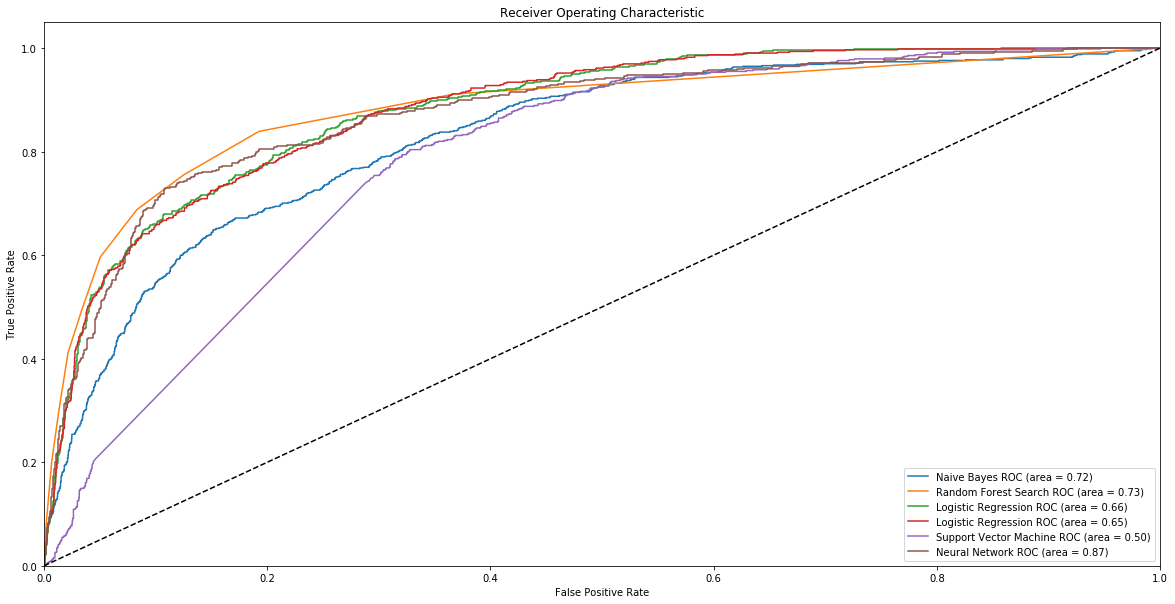

In [33]:
# plotting ROC curves


plt.figure(figsize=(20,10))
for m in models:
  model = m['model']
  x_test = m['x_test']
  y_test = m['y_test']
  pred_proba = model.predict_proba(x_test)
  if m['label'] != 'Neural Network':
    pred_proba = pred_proba[:,1]
  # Compute False postive rate, and True positive rate
  fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
  # Calculate Area under the curve to display on the plot
  auc = roc_auc_score(y_test,model.predict(x_test))
  # Now, plot the computed values
  plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

From the above plot of ROC curves for the explored models, we can observe that Neural Network has the largest area under the curve. The dotted line denotes a model that makes predictions at random. Hence, we can safely say that all our models perform better than a random classifier.

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

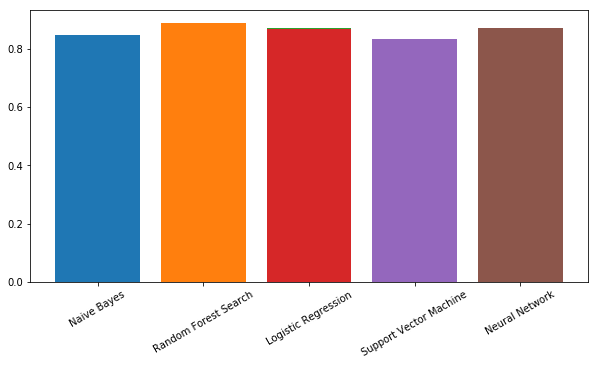

In [34]:
plt.figure(figsize=(10, 5))
for m in models:
  model = m['model']
  x_test = m['x_test']
  y_test = m['y_test']
  
  if m['label'] != 'Neural Network':
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
  else:
    acc_score = test_acc
  plt.bar(m['label'], acc_score)
plt.xticks(rotation=30)